# 1. Creación de las señales con ruido

In [1]:
import pandas
import random


def get_random_number(noise_factor):
    return random.uniform(-1, 1) * noise_factor 


def add_noise(data, noise_factor):
    for i in range(0, len(data)):
        data[i] = data[i] + get_random_number(noise_factor)
    return data


def get_new_name(file_name, noise_factor):
    return file_name.replace('.csv', '_noisy{}.csv'.format(noise_factor))


def add_white_noise(file_name, noise_factor):
    dataFrame = pandas.read_csv(file_name)
    new_data = add_noise(dataFrame['data'].values, noise_factor)
    new_dataFrame = pandas.DataFrame({'data': new_data, 'label': dataFrame['label'].values})
    new_dataFrame.to_csv(get_new_name(file_name, noise_factor), index=False)
    print('{} : done!'.format(file_name))
    
    

csv_files = ['señal_senoidal_anomala_1.1porciento_40.csv', 
             'señal_senoidal_anomala_2porciento.csv',
             'señal_senoidal_combinada_anomala_1.1porciento_40.csv'
            ]

for file in csv_files:
    for factor in [0.20, 0.10, 0.050, 0.025]:
        add_white_noise(file, factor) 


señal_senoidal_anomala_1.1porciento_40.csv : done!
señal_senoidal_anomala_1.1porciento_40.csv : done!
señal_senoidal_anomala_1.1porciento_40.csv : done!
señal_senoidal_anomala_1.1porciento_40.csv : done!
señal_senoidal_anomala_2porciento.csv : done!
señal_senoidal_anomala_2porciento.csv : done!
señal_senoidal_anomala_2porciento.csv : done!
señal_senoidal_anomala_2porciento.csv : done!
señal_senoidal_combinada_anomala_1.1porciento_40.csv : done!
señal_senoidal_combinada_anomala_1.1porciento_40.csv : done!
señal_senoidal_combinada_anomala_1.1porciento_40.csv : done!
señal_senoidal_combinada_anomala_1.1porciento_40.csv : done!


# 2. Gráficas para comprobar el resultado

In [19]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook


def plot_signal(señal_anomala, title):
    fig, axes = plt.subplots()
    axes.plot(señal_anomala, '-')
    axes.set_ylim(np.amin(señal_anomala) - 0.5, np.amax(señal_anomala) + 0.5)
    axes.set_title(title)
    axes.set_xlabel('tiempo')
    axes.set_ylabel('señal')
    axes.grid(True)
    fig.show()

<IPython.core.display.Javascript object>


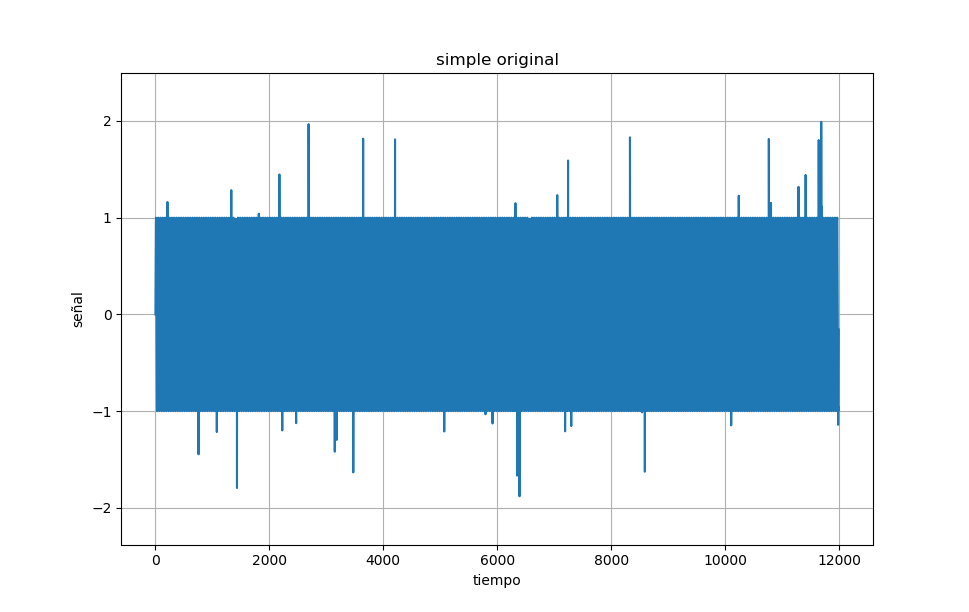

<IPython.core.display.Javascript object>


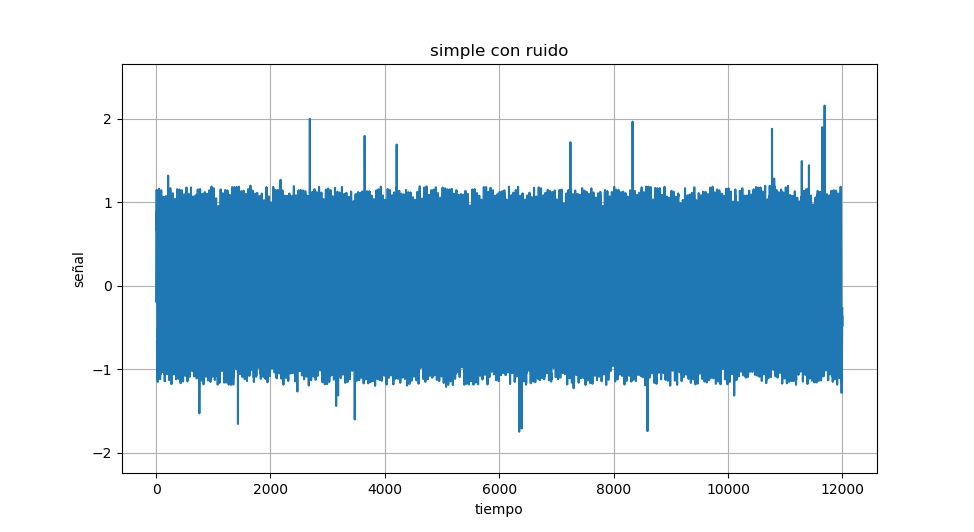

In [20]:

dataFrame  = pandas.read_csv('señal_senoidal_anomala_1.1porciento_40.csv') 
plot_signal(dataFrame['data'].values, 'simple original')


dataFrame  = pandas.read_csv('señal_senoidal_anomala_1.1porciento_40_noisy.csv') 
plot_signal(dataFrame['data'].values, 'simple con ruido')


<IPython.core.display.Javascript object>


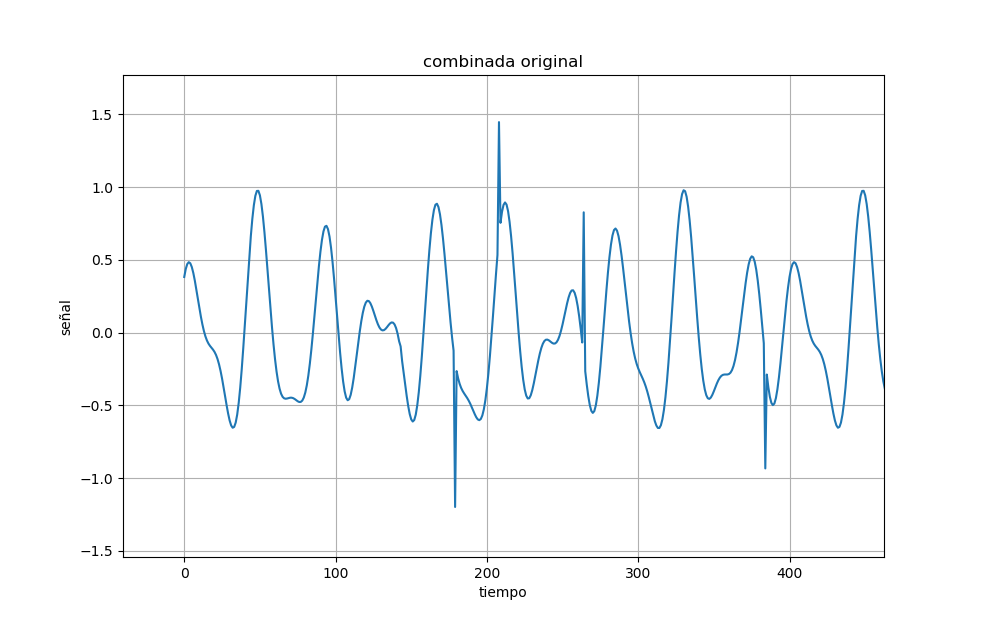

<IPython.core.display.Javascript object>


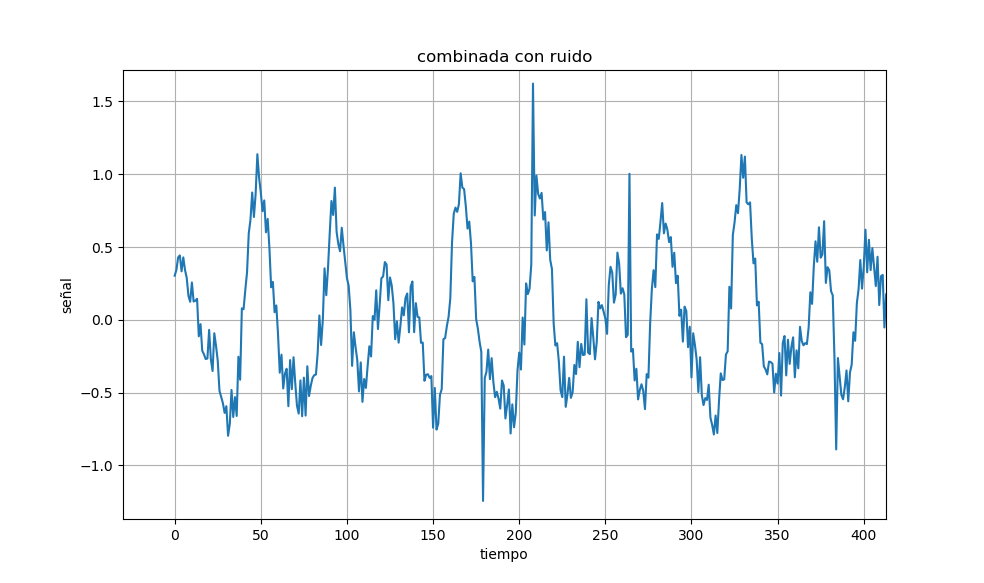

In [21]:

dataFrame  = pandas.read_csv('señal_senoidal_combinada_anomala_1.1porciento_40.csv') 
plot_signal(dataFrame['data'].values, 'combinada original')

dataFrame  = pandas.read_csv('señal_senoidal_combinada_anomala_1.1porciento_40_noisy.csv') 
plot_signal(dataFrame['data'].values, 'combinada con ruido')
